In [1]:
!pip install pandas numpy matplotlib seaborn plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
data = pd.read_csv('data/All the Intermediate Colleges in_Pakistan.csv')  # Update with actual file path

In [7]:
data.head()       # First few records



,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
12,Punjab Group of Colleges PGC Lahore,"1 Noon Avenue, New Muslim Town at Canal Bank L...",FSc Pre Engineering ICS Computer Science FSc P...,Private,University of the Punjab Lahore \n BISE Lahore,2*
19,Govt College of Science Wahdat Road Lahore,"Govt. College of Science, Wahdat Road Lahore,",FSC pre Engineering ICS FSC pre medical ICOM F...,Public,Board of Intermediate Secondary Education Laho...,3*


In [ ]:
# Display dataset shape
print("Dataset Shape:", data.shape)


Dataset Shape: (75, 6)


In [ ]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 1588
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           75 non-null     object
 1   Location       75 non-null     object
 2   Study Program  75 non-null     object
 3   Sector         75 non-null     object
 4   Affiliation    75 non-null     object
 5   Rating         75 non-null     object
dtypes: object(6)
memory usage: 4.1+ KB


In [10]:
# Check for missing values
data.isnull().sum()

Name             0
Location         0
Study Program    0
Sector           0
Affiliation      0
Rating           0
dtype: int64

In [12]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)



In [16]:
# For numerical columns, fill missing values with the column median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

In [15]:
# For categorical columns, fill with mode (common value) if needed
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

c:\Users\e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


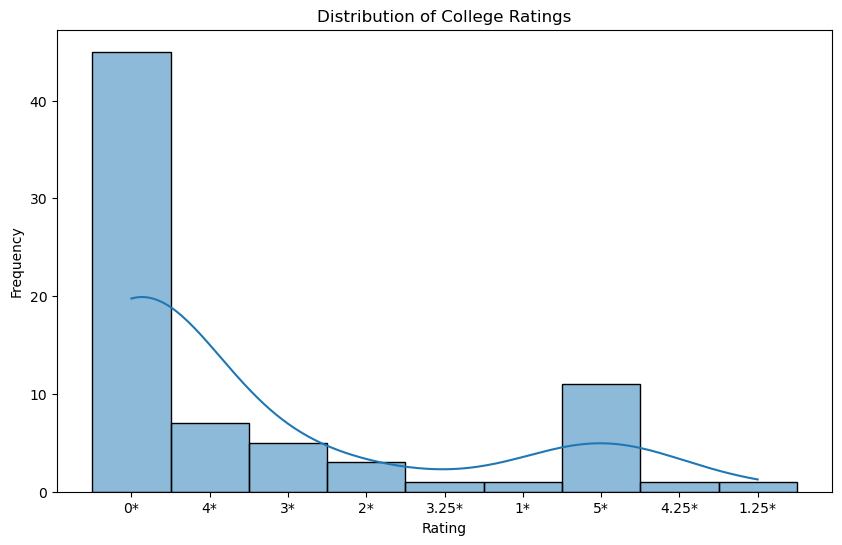

In [18]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Plot only top 10 affiliations
top_affiliations = data['Location'].value_counts().nlargest(10).index
filtered_data = data[data['Location'].isin(top_locations)]

plt.figure(figsize=(14, 8))
sns.countplot(y='Location', data=filtered_data, order=location)
plt.title('Top 10 Affiliations of Colleges')
plt.xlabel('Number of Colleges by Location')
plt.ylabel('Location')
plt.show()


NameError: name 'top_locations' is not defined

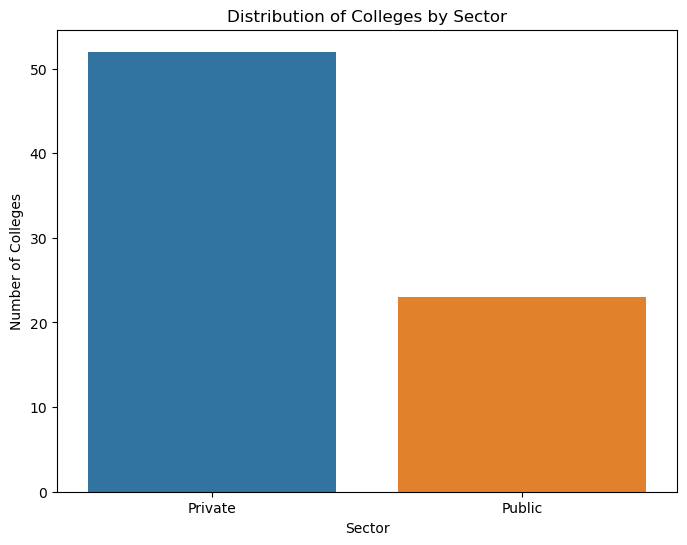

In [ ]:
# Count of colleges by sector (e.g., Public vs. Private)
plt.figure(figsize=(14, 8))
sns.countplot(x='Sector', data=data)
plt.title('Distribution of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.show()


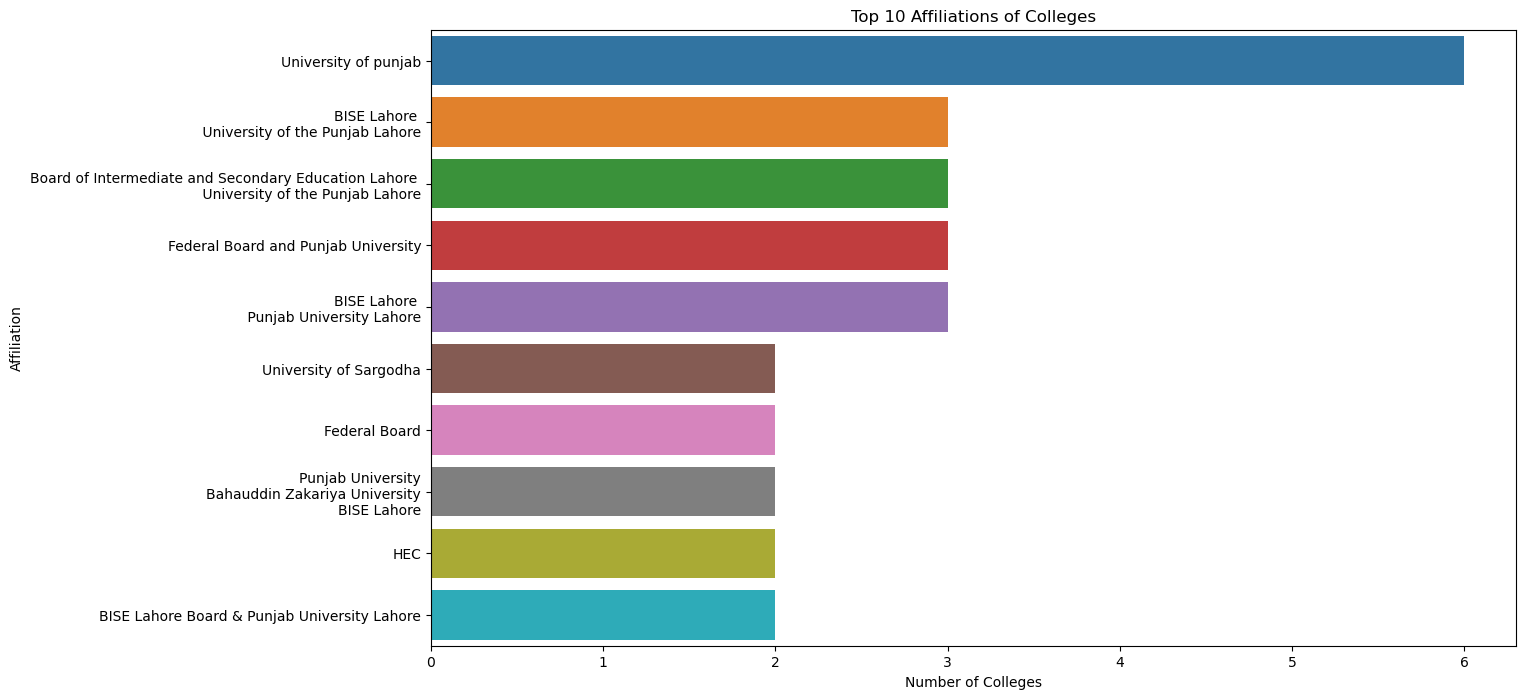

In [ ]:
# Plot only top 10 affiliations
top_affiliations = data['Affiliation'].value_counts().nlargest(10).index
filtered_data = data[data['Affiliation'].isin(top_affiliations)]

plt.figure(figsize=(14, 8))
sns.countplot(y='Affiliation', data=filtered_data, order=top_affiliations)
plt.title('Top 10 Affiliations of Colleges')
plt.xlabel('Number of Colleges')
plt.ylabel('Affiliation')
plt.show()
